In [1]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

Text(0.5, 1.0, 'Gray Image ')

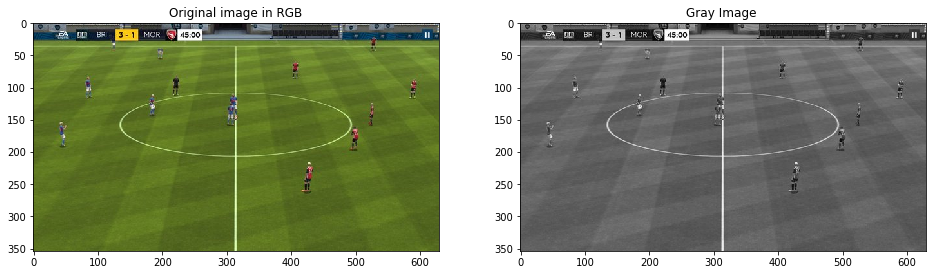

In [3]:
img = cv2.imread('../images/fifa-2019.jpg')

# Convert BGR (cv2 read Mode) to RGB (matplotlib plot mode)
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(16,16))

plt.subplot(121)
plt.imshow(rgb_img)
plt.title("Original image in RGB")

# Convert it to GrayScale to do the Canny Method
gray = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY) 
plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image ")

## Edge Detecting and Hough Transform

Text(0.5, 1.0, 'Dilated Edges ')

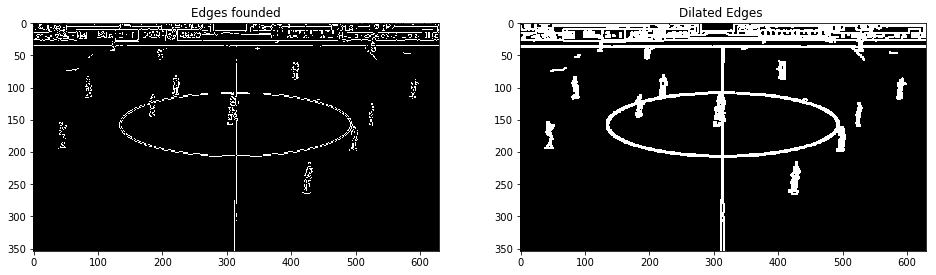

In [4]:
# Getting the Edges Detect by Canny Method
edges_50_100 = cv2.Canny(gray,50,100)
edges_50_100[np.where(edges_50_100 == 255)] = 1

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(edges_50_100, cmap='gray')
plt.title("Edges founded")

# Doing 
from skimage import morphology
dilated_edges = morphology.binary_dilation(edges_50_100, morphology.square(3)).astype(np.uint8)
plt.subplot(122)
plt.imshow(dilated_edges, cmap='gray')
plt.title("Dilated Edges ")

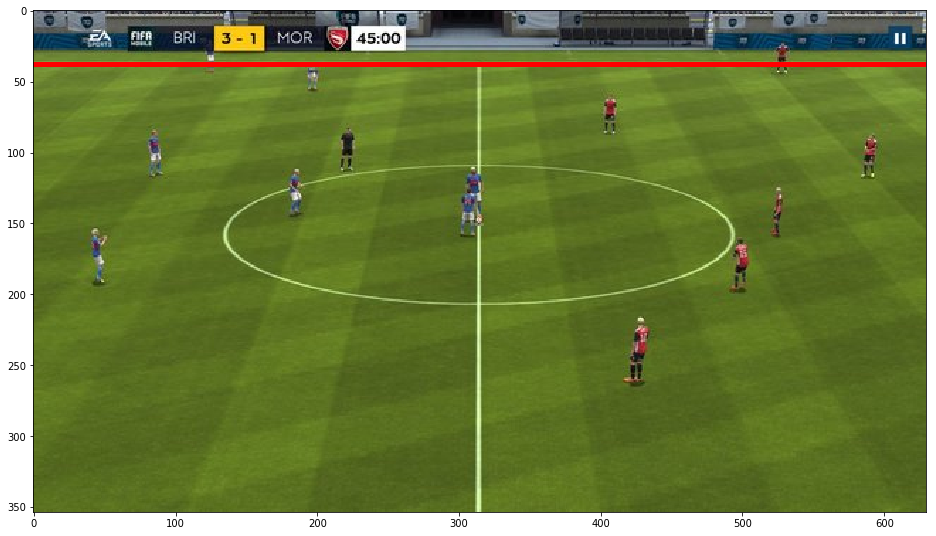

In [5]:
lines = cv2.HoughLinesP(dilated_edges,1,np.pi/180, 200, minLineLength=150,maxLineGap=10)
for x1,y1,x2,y2 in lines[1]:
    cv2.line(rgb_img,(x1,y1), (x2,y2), (255,0,0),2)
# for line in lines:
#     x1,y1,x2,y2 = line[0]
#     cv2.line(rgb_img,(x1,y1), (x2,y2), (255,0,0),2)
plt.figure(figsize=(16,16))
plt.imshow(rgb_img)

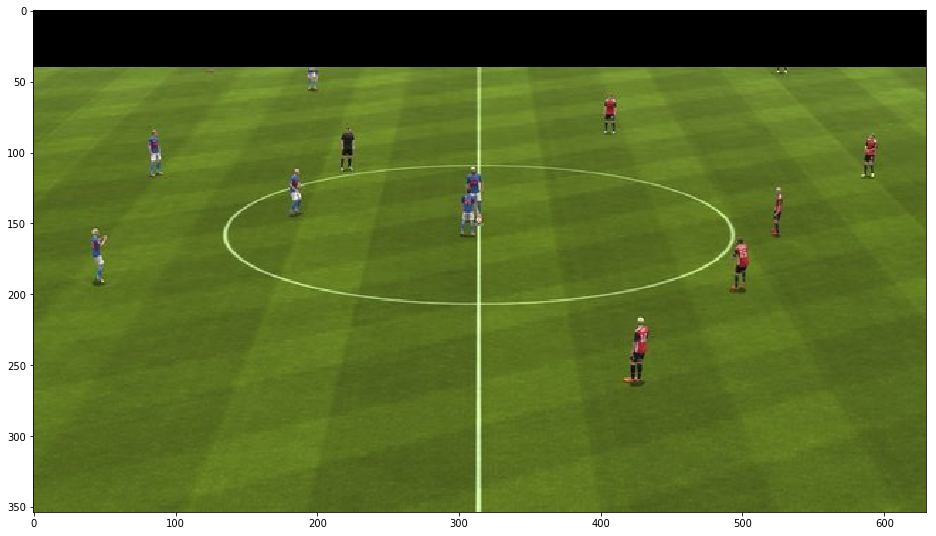

In [6]:
final_image = rgb_img.copy()
final_image[:y2+2,:] = 0
plt.figure(figsize=(16,16))
plt.imshow(final_image)

In [7]:
final_image = cv2.cvtColor(final_image,cv2.COLOR_RGB2BGR) 
cv2.imwrite('../images/result-LineDetected.jpg', final_image)

True